# Questão 1



## 1.2. Elabore um gráfico para o grafo

Nesta etapa, vamos:
- Carregar a matriz de adjacência da instância `san200-0-9-3.mtx`, atribuída ao aluno **Lucas Lopes Silva**.
- Verificar se o grafo é direcionado ou não.
- Construir o grafo com a biblioteca `networkx`.
- Obter o número de vértices e arestas.
- Visualizar o grafo.

In [1]:
#!pip install scipy
#!pip install seaborn

In [37]:
import pandas as pd
from collections import Counter,defaultdict
import seaborn as sns
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import mmread
import plotly.graph_objects as go
from collections import Counter


# Carregamento do arquivo .mtx
mtx = mmread("san200-0-9-3.mtx")

# Verificando se a matriz é simétrica para saber se o grafo é direcionado
is_symmetric = (mtx != mtx.T).nnz == 0  # nnz conta elementos não zero

print("O grafo é direcionado?", not is_symmetric)

# Construção do grafo com NetworkX
G = (
    nx.from_scipy_sparse_array(mtx) if is_symmetric
    else nx.from_scipy_sparse_array(mtx, create_using=nx.DiGraph)
)


O grafo é direcionado? False


### Visualização do grafo

Vamos utilizar o layout aleatório com seed fixa para garantir reprodutibilidade.

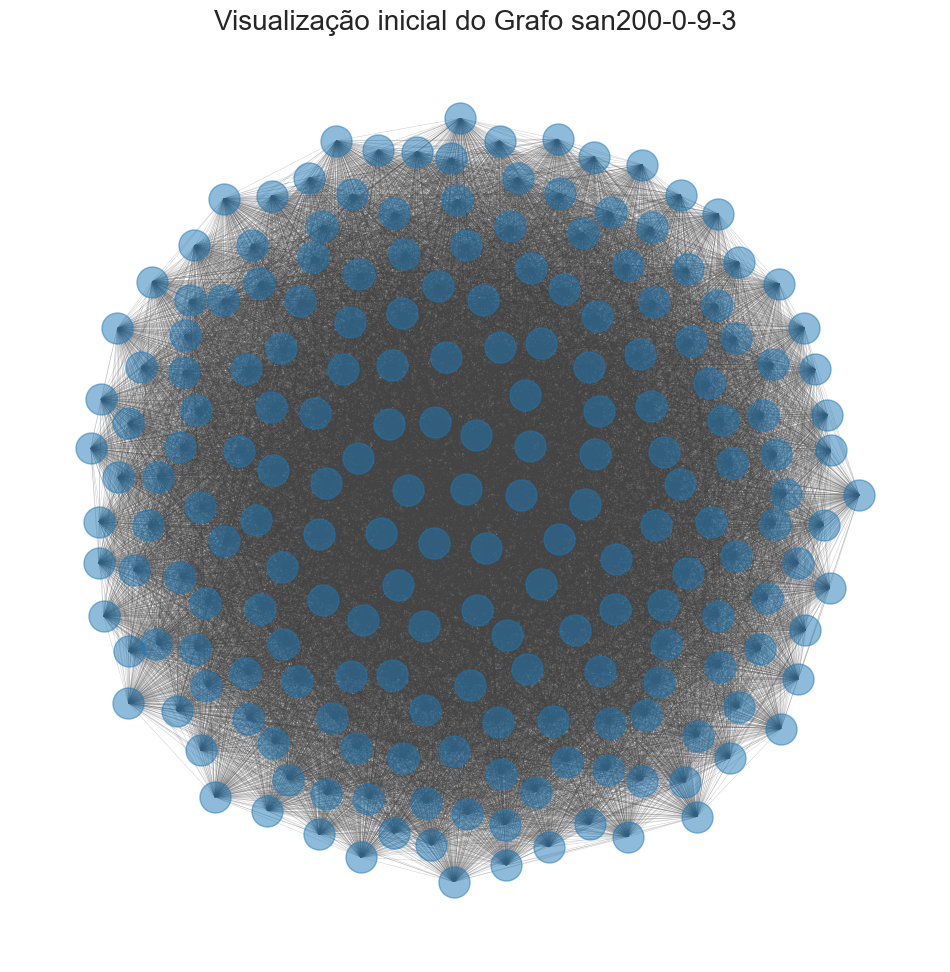

In [43]:
# Layout mais apropriado para densidade visual
pos = nx.spring_layout(G, seed=568381, k=0.2, iterations=100)

# Ajustar tamanho da aresta com base em algum critério (aqui: constante)
edge_width = 0.3

plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(
    G,
    pos,
    node_size=500,
    node_color="#1f78b4",
    alpha=0.5,
)
nx.draw_networkx_edges(
    G,
    pos,
    node_size=500,
    width=edge_width,  # controle de espessura das arestas
    edge_color="#444444",
    alpha=0.3,

)

plt.title("Visualização inicial do Grafo san200-0-9-3", fontsize=20)
plt.axis('off')
plt.show()

## 1.3. Esse grafo é conexo? Justifique.


In [4]:
# Verifica se o grafo é conexo
conexo = nx.is_connected(G)
print("O grafo é conexo?", conexo)

# Caso não seja, mostrar quantos componentes conexos existem
if not conexo:
    num_componentes = nx.number_connected_components(G)
    print(f"Número de componentes conexos: {num_componentes}")

O grafo é conexo? True


Sim, o grafo é **conexo**. Portanto, **existe um caminho entre qualquer par de vértices** do grafo.

Essa verificação foi feita utilizando a função `nx.is_connected()` da biblioteca `networkx`, a qual retornou `True`.

Caso o grafo fosse desconexo, a função `nx.number_connected_components()` permitiria identificar a quantidade de componentes desconexos.

## 1.4. Qual o número de vértices e arestas do grafo?

In [5]:
print(f"Número de vértices: {G.number_of_nodes()}")
print(f"Número de arestas: {G.number_of_edges()}")

Número de vértices: 200
Número de arestas: 17910


---
# 2- Utilizando o grafo construida na questão 1, Calcule as seguintes métricas

1. Densidade.
2. Comprimento médio dos caminhos.
3. Coeficiente de agrupamento total do grafo.
4. Elabore um texto de acordo com suas observações e conclusões em relação aos itens 1-3.

In [6]:
# 1 - Densidade
print(f" 1. Densidade do grafo: {nx.density(G):.4f}")

# 2 - Comprimento médio dos caminhos
print(f" 2. Comprimento médio dos caminhos: {nx.average_shortest_path_length(G):.4f}")

#3 - Coeficiente de agrupamento total do grafo
print(f" 3. Coeficiente de agrupamento total do grafo: {nx.average_clustering(G):.4f}")


 1. Densidade do grafo: 0.9000
 2. Comprimento médio dos caminhos: 1.1000
 3. Coeficiente de agrupamento total do grafo: 0.8997


### Análise das Métricas

#### 1. Densidade
A densidade do grafo foi de **0.9**, o que indica que a rede está **muito próxima de ser completa**, ou seja, quase todos os pares de vértices estão conectados por uma aresta.

#### 2. Comprimento médio dos caminhos
O comprimento médio dos caminhos foi **1.1**, muito próximo de 1. Isso ocorre porque quase todos os nós estão diretamente conectados, ou no máximo a um vizinho de distância, o que é coerente com a alta densidade observada.

#### 3. Coeficiente de agrupamento
O coeficiente de agrupamento médio foi aproximadamente **0.8997**, o que significa que os vizinhos de um vértice tendem a estar fortemente conectados entre si. Isso confirma a **alta transitividade** da rede, reforçando a presença de triângulos e subestruturas fortemente interligadas.

Portanto, a rede analisada é altamente conectada, com caminhos curtos entre os vértices e forte tendência de formação de clusters. Essas propriedades são típicas de redes quase completa, e sugerem uma topologia densa e coesa.

---

# 3 - Utilizando o grafo construido na questão 1, calcule as seguintes métricas para o grafo.
1. Excentricidade.
2. Comprimento médio dos caminhos.
3. Grau dos vértices. Qual(is) vértice(s) tem o maior grau.
4. Centralidade de proximidade.
5. Centralidade de intermediação.
6. Elabore um gráfico mostrando cada uma das médidas calculadas nos itens 1-5.
7. Elabore um texto de acordo com suas observações e conclusões em relação aos itens 1-5.

In [7]:
# 1. Excentricidade
excentricidades = nx.eccentricity(G)

# Frequência das excentricidades
freq_excentricidade = Counter(excentricidades.values())

# Transformar em DataFrame ordenado
df_excentricidade = pd.DataFrame.from_dict(freq_excentricidade, orient='index', columns=['Frequência'])
df_excentricidade.index.name = 'Excentricidade'
df_excentricidade = df_excentricidade.sort_index()

print(" 3.1 Tabela de frequências de Excentricidade:")
display(df_excentricidade)

 3.1 Tabela de frequências de Excentricidade:


,Frequência
Excentricidade,
2,200


In [8]:
# 2. Comprimento médio dos caminhos (reutilizado da questão anterior)
caminho_medio = nx.average_shortest_path_length(G)

# Exibir os resultados principais
print(f"3.2 Comprimento médio dos caminhos: {caminho_medio:.4f}")

3.2 Comprimento médio dos caminhos: 1.1000


In [9]:
# 3. Grau dos vértices
graus = dict(G.degree())
# Agrupar vértices por grau
grau_para_vertices = defaultdict(list)

for v, g in graus.items():
    grau_para_vertices[g].append(v)

# Criar DataFrame ordenado por grau
df_graus = pd.DataFrame(
    [(g, sorted(vs)) for g, vs in sorted(grau_para_vertices.items())],
    columns=["Grau", "Vértices"]
)
print("3.3.1 Tabela de Grau dos vértices:")
display(df_graus)

3.3.1 Tabela de Grau dos vértices:


,Grau,Vértices
0,166,[7]
1,170,"[11, 191]"
2,171,"[122, 182]"
3,172,[98]
4,173,"[66, 70, 145, 153]"
5,174,"[0, 13, 40, 71, 80, 114, 120, 124, 128, 169, 1..."
6,175,"[25, 35, 38, 43, 59, 61, 81, 91, 101, 107, 111..."
7,176,"[34, 39, 86, 88, 109, 112, 126, 131, 168]"
8,177,"[22, 23, 62, 68, 97, 105, 115, 132, 137, 138, ..."
9,178,"[2, 4, 6, 27, 51, 53, 55, 58, 60, 82, 99, 104,..."


In [10]:
max_grau = max(graus.values())
nós_maior_grau = [n for n, g in graus.items() if g == max_grau]

print(f"3.3.2 Nó(s) com maior grau ({max_grau}): {nós_maior_grau}")

3.3.2 Nó(s) com maior grau (187): [17, 95]


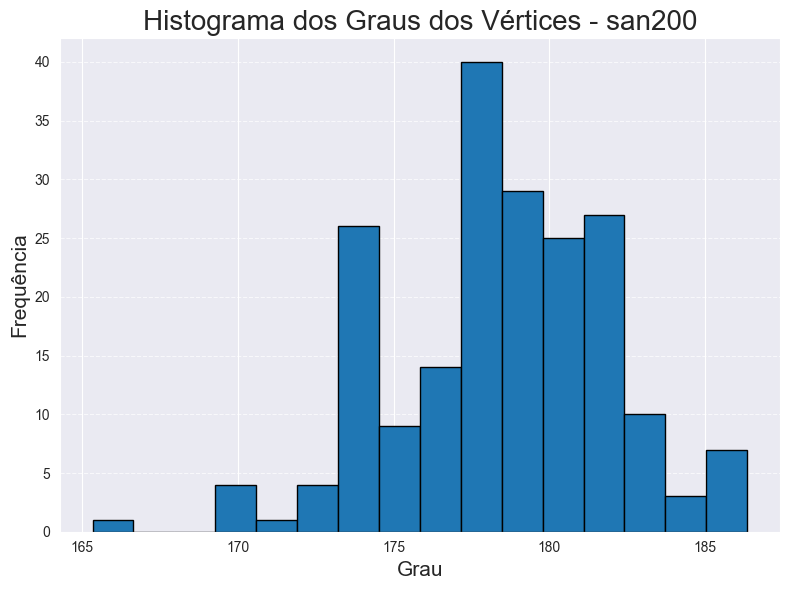

In [11]:
san200_graus = [grau for _, grau in G.degree()]
# Plotar histograma
plt.figure(figsize=(8, 6))
plt.hist(san200_graus, bins='auto', edgecolor='black', align='left')
plt.xlabel("Grau", fontsize=15)
plt.ylabel("Frequência", fontsize=15)
plt.title("Histograma dos Graus dos Vértices - san200", fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
# 4. Centralidade de proximidade
prox_centralidade = nx.closeness_centrality(G)

print("Nó  |  Centralidade de proximidade ")
for i in nx.nodes(G):
    print(f"{i} | {prox_centralidade[i]:.4f}")

Nó  |  Centralidade de proximidade 
0 | 0.8884
1 | 0.9171
2 | 0.9045
3 | 0.9087
4 | 0.9045
5 | 0.9171
6 | 0.9045
7 | 0.8578
8 | 0.9087
9 | 0.9299
10 | 0.9213
11 | 0.8728
12 | 0.9171
13 | 0.8884
14 | 0.9256
15 | 0.9213
16 | 0.9256
17 | 0.9431
18 | 0.9128
19 | 0.9171
20 | 0.9171
21 | 0.9128
22 | 0.9005
23 | 0.9005
24 | 0.9387
25 | 0.8924
26 | 0.9128
27 | 0.9045
28 | 0.9128
29 | 0.9299
30 | 0.9343
31 | 0.9128
32 | 0.9128
33 | 0.9256
34 | 0.8964
35 | 0.8924
36 | 0.9087
37 | 0.9213
38 | 0.8924
39 | 0.8964
40 | 0.8884
41 | 0.9171
42 | 0.9213
43 | 0.8924
44 | 0.9171
45 | 0.9171
46 | 0.9171
47 | 0.9087
48 | 0.9213
49 | 0.9128
50 | 0.9213
51 | 0.9045
52 | 0.9128
53 | 0.9045
54 | 0.9387
55 | 0.9045
56 | 0.9213
57 | 0.9128
58 | 0.9045
59 | 0.8924
60 | 0.9045
61 | 0.8924
62 | 0.9005
63 | 0.9087
64 | 0.9128
65 | 0.9387
66 | 0.8844
67 | 0.9343
68 | 0.9005
69 | 0.9128
70 | 0.8844
71 | 0.8884
72 | 0.9087
73 | 0.9213
74 | 0.9171
75 | 0.9387
76 | 0.9128
77 | 0.9256
78 | 0.9128
79 | 0.9087
80 | 0.8884
81

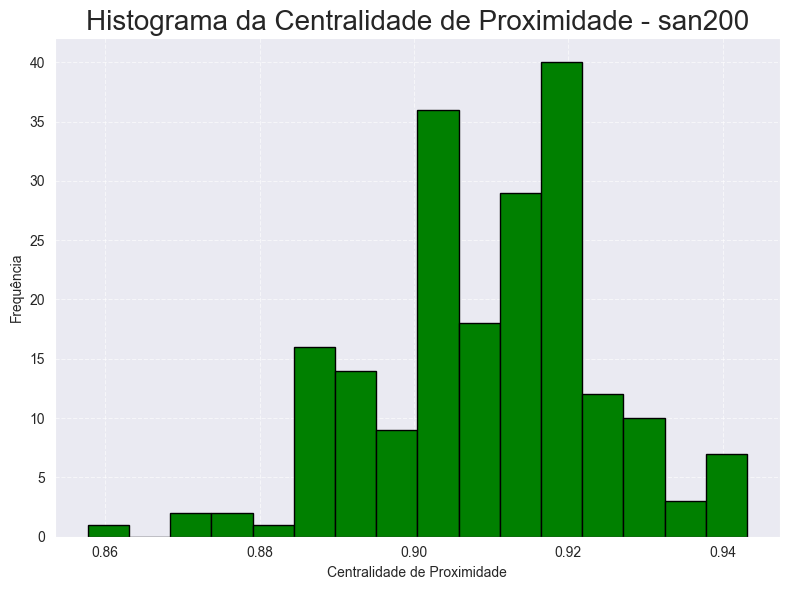

In [13]:
# Extrair os valores (sem os rótulos dos nós)
san200_cproximidade  = list(prox_centralidade.values())

# Plotar histograma
plt.figure(figsize=(8, 6))
plt.hist(san200_cproximidade, bins='auto', color='green', edgecolor='black')
plt.xlabel("Centralidade de Proximidade")
plt.ylabel("Frequência")
plt.title("Histograma da Centralidade de Proximidade - san200", fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [14]:
# 5. Centralidade de intermediação
intermed_centralidade = nx.betweenness_centrality(G)

print("Nó  |  Centralidade de intermediação ")
for i in nx.nodes(G):
    print(f"{i} | {intermed_centralidade[i]:.6f}")

Nó  |  Centralidade de intermediação 
0 | 0.000468
1 | 0.000518
2 | 0.000506
3 | 0.000504
4 | 0.000500
5 | 0.000529
6 | 0.000497
7 | 0.000426
8 | 0.000505
9 | 0.000537
10 | 0.000520
11 | 0.000455
12 | 0.000513
13 | 0.000476
14 | 0.000520
15 | 0.000525
16 | 0.000534
17 | 0.000551
18 | 0.000516
19 | 0.000518
20 | 0.000515
21 | 0.000516
22 | 0.000492
23 | 0.000490
24 | 0.000542
25 | 0.000487
26 | 0.000510
27 | 0.000506
28 | 0.000517
29 | 0.000534
30 | 0.000538
31 | 0.000517
32 | 0.000515
33 | 0.000532
34 | 0.000485
35 | 0.000471
36 | 0.000500
37 | 0.000520
38 | 0.000478
39 | 0.000471
40 | 0.000488
41 | 0.000516
42 | 0.000528
43 | 0.000471
44 | 0.000515
45 | 0.000510
46 | 0.000513
47 | 0.000512
48 | 0.000522
49 | 0.000515
50 | 0.000530
51 | 0.000507
52 | 0.000503
53 | 0.000492
54 | 0.000544
55 | 0.000496
56 | 0.000522
57 | 0.000515
58 | 0.000495
59 | 0.000478
60 | 0.000507
61 | 0.000486
62 | 0.000488
63 | 0.000500
64 | 0.000516
65 | 0.000546
66 | 0.000467
67 | 0.000546
68 | 0.000502
69 | 0

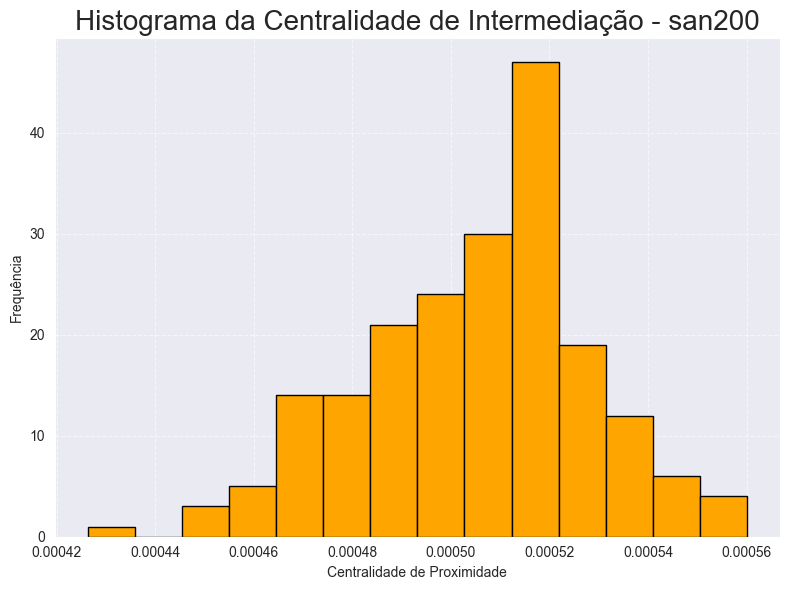

In [15]:
# Extrair os valores (sem os rótulos dos nós)
san200_intermediacao = list(intermed_centralidade.values())

# Plotar histograma
plt.figure(figsize=(8, 6))
plt.hist(san200_intermediacao, bins='auto', color='orange', edgecolor='black')
plt.xlabel("Centralidade de Proximidade")
plt.ylabel("Frequência")
plt.title("Histograma da Centralidade de Intermediação - san200", fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [16]:
# Agrupar vértices por Centralidade de intermediação
centralidade = dict(nx.betweenness_centrality(G))
centralidade_para_vertices = defaultdict(list)

for v, g in centralidade.items():
    centralidade_para_vertices[g].append(v)

# Criar DataFrame ordenado por grau
df_graus = pd.DataFrame(
    [(g, sorted(vs)) for g, vs in sorted(centralidade_para_vertices.items())],
    columns=["Centralidade de proximidade", "Vértices"]
)
print("3.5 Tabela de Centralidade dos vértices:")
display(df_graus)

3.5 Tabela de Centralidade dos vértices:


,Centralidade de proximidade,Vértices
0,0.000426,[7]
1,0.000453,[182]
2,0.000455,[70]
3,0.000455,[11]
4,0.000455,[191]
...,...,...
195,0.000546,[67]
196,0.000551,[17]
197,0.000551,[75]
198,0.000552,[159]


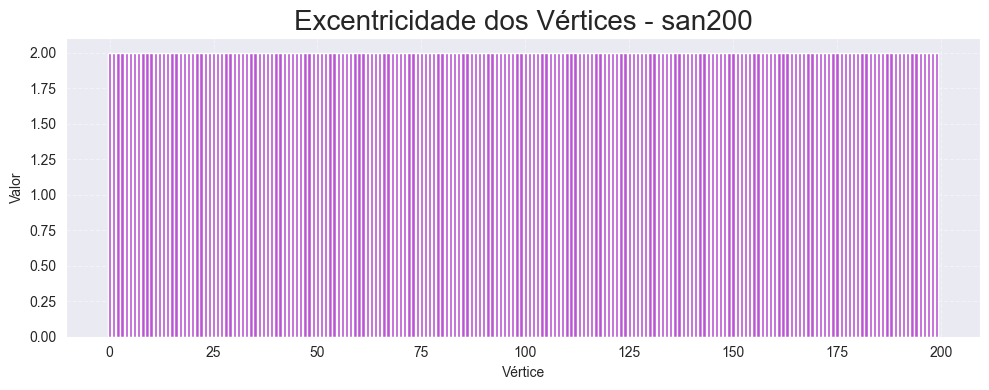

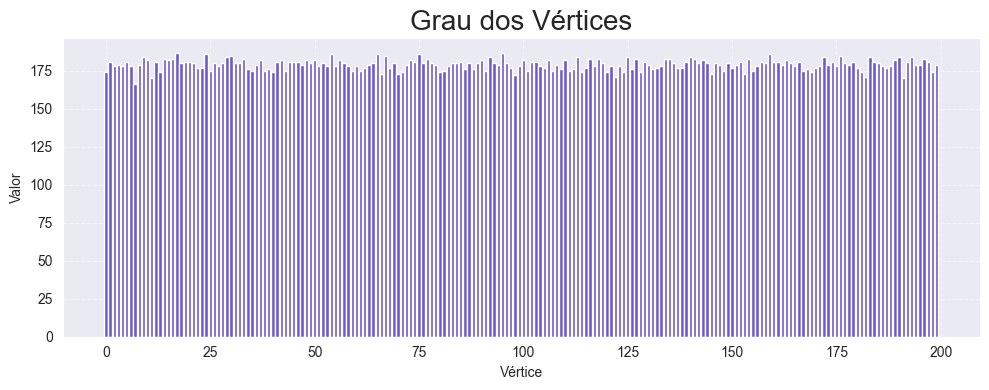

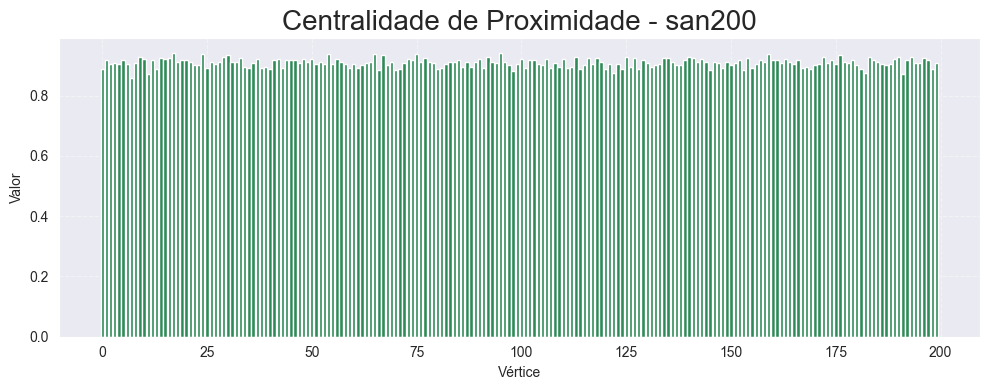

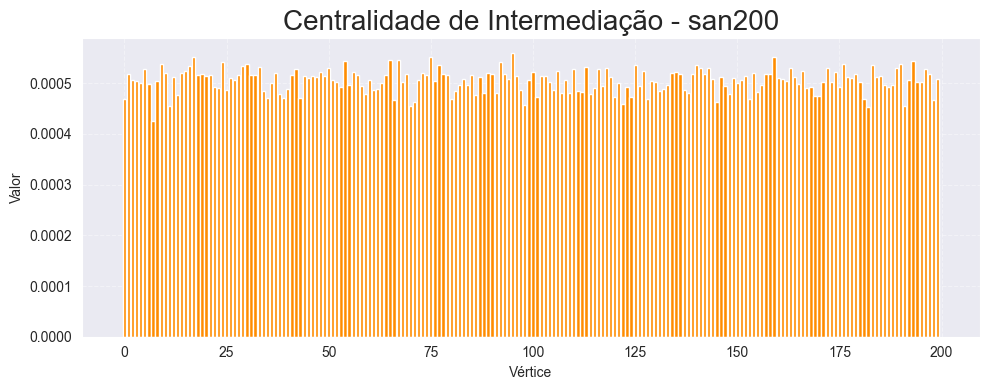

In [17]:
#6 Gráfico
def plot_metric(metric_dict, title, color='dodgerblue'):
    plt.figure(figsize=(10, 4))
    plt.bar(metric_dict.keys(), metric_dict.values(), color=color)
    plt.title(title, fontsize=20)
    plt.xlabel("Vértice")
    plt.ylabel("Valor")
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


# Gráficos para cada uma das 5 métricas
plot_metric(excentricidades, "Excentricidade dos Vértices - san200", color='mediumorchid')
plot_metric(graus, "Grau dos Vértices", color='slateblue')
plot_metric(prox_centralidade, "Centralidade de Proximidade - san200", color='seagreen')
plot_metric(intermed_centralidade, "Centralidade de Intermediação - san200", color='darkorange')

## 3.7 Análise sobre as Métricas

### 1. Excentricidade
A excentricidade de todos os vértices foi **2**, o que indica que qualquer nó pode atingir qualquer outro em, no máximo, dois passos. Essa uniformidade e valor extremamente baixo reforçam o caráter de **rede densamente conectada** e **com pequeno diâmetro**, típico de grafos quase completos.

### 2. Grau dos vértices
O grau mínimo observado foi **166** (vértice 7), e o máximo foi **187** (vértices 17 e 95), dentro de um possível máximo de 199 (para um grafo com 200 nós). A maioria dos nós apresenta grau entre **174 e 184**, o que mostra uma distribuição **concentrada** e **altamente conectada**, com poucos desvios. Esse padrão é coerente com o fato da rede ser quase completa, onde cada vértice está ligado à grande maioria dos demais.

### 3. Centralidade de Proximidade
As centralidades de proximidade variaram entre **0.8767** e **0.9431**, com a maioria dos vértices acima de **0.90**, reforçando que todos os nós estão "próximos" dos demais. Isso indica que qualquer vértice pode ser alcançado com grande eficiência, o que corrobora os resultados da excentricidade e do comprimento médio dos caminhos.

### 4. Centralidade de Intermediação
Os valores de centralidade de intermediação foram **baixos e bastante homogêneos**, variando de aproximadamente **0.0004 a 0.00056**. Isso mostra que **nenhum vértice é essencial como intermediário nos caminhos entre outros pares**, pois há **diversos caminhos alternativos** — característica comum em redes densamente conectadas. Os vértices com maior centralidade de intermediação (como o 95, 159, 75 e 17) ainda assim exercem influência muito discreta na estrutura geral da rede.

### 5. Conclusão Geral
O grafo apresenta todas as propriedades típicas de uma rede **quase completa**: alta densidade, pequeno diâmetro, baixa excentricidade, grau elevado e distribuído uniformemente, caminhos curtos e pouca centralização.

---

# 4 - Utilizando a rede construida na questão 1.
Calcule as métricas de centralidade da centralidade.

1. Centralidade de Autovetor.
2. Centralidade de PageRank (alpha=0.65).
3. Centralidade de Katz (alpha=0.08,beta=1).
4. Elabore um gráfico que mostre os resultados encontrados nos itens 1-3.
5. Elabore um texto com suas observações e conclusões em relação aos itens 1-3.

In [18]:
# 1. Centralidade de Autovetor
centralidade_autovetor = nx.eigenvector_centrality(G, max_iter=1000)

print("Nó  |  Centralidade de autovetor ")
for i in nx.nodes(G):
    print(f"{i} | {centralidade_autovetor[i]:.4f}")

Nó  |  Centralidade de autovetor 
0 | 0.0687
1 | 0.0714
2 | 0.0702
3 | 0.0707
4 | 0.0703
5 | 0.0714
6 | 0.0703
7 | 0.0656
8 | 0.0707
9 | 0.0726
10 | 0.0719
11 | 0.0671
12 | 0.0715
13 | 0.0687
14 | 0.0723
15 | 0.0718
16 | 0.0722
17 | 0.0738
18 | 0.0710
19 | 0.0714
20 | 0.0715
21 | 0.0710
22 | 0.0699
23 | 0.0699
24 | 0.0734
25 | 0.0691
26 | 0.0710
27 | 0.0702
28 | 0.0710
29 | 0.0726
30 | 0.0730
31 | 0.0710
32 | 0.0710
33 | 0.0722
34 | 0.0695
35 | 0.0691
36 | 0.0707
37 | 0.0719
38 | 0.0691
39 | 0.0696
40 | 0.0686
41 | 0.0715
42 | 0.0718
43 | 0.0691
44 | 0.0715
45 | 0.0715
46 | 0.0715
47 | 0.0706
48 | 0.0718
49 | 0.0710
50 | 0.0718
51 | 0.0702
52 | 0.0711
53 | 0.0703
54 | 0.0734
55 | 0.0703
56 | 0.0718
57 | 0.0710
58 | 0.0703
59 | 0.0691
60 | 0.0702
61 | 0.0691
62 | 0.0699
63 | 0.0707
64 | 0.0710
65 | 0.0734
66 | 0.0683
67 | 0.0730
68 | 0.0698
69 | 0.0710
70 | 0.0684
71 | 0.0688
72 | 0.0706
73 | 0.0718
74 | 0.0714
75 | 0.0734
76 | 0.0711
77 | 0.0722
78 | 0.0710
79 | 0.0706
80 | 0.0687
81 |

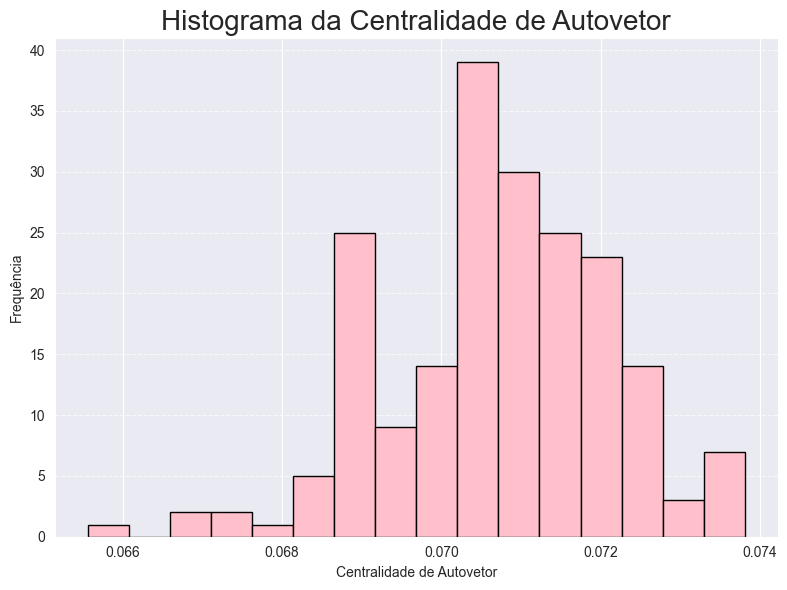

In [19]:
# Extrair os valores da centralidade de autovetor
cautovetor_san200 = list(centralidade_autovetor.values())

# Plotar histograma com intervalos (30 classes)
plt.figure(figsize=(8, 6))
plt.hist(cautovetor_san200, bins='auto', color='pink', edgecolor='black')
plt.xlabel("Centralidade de Autovetor")
plt.ylabel("Frequência")
plt.title("Histograma da Centralidade de Autovetor", fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
# 2. Centralidade de PageRank com alpha = 0.65
centralidade_pagerank = nx.pagerank(G, alpha=0.65)

print("Nó  |  Centralidade de pagerank (alpha=0.65) ")
for i in nx.nodes(G):
    print(f"{i} | {centralidade_pagerank[i]:.5f}")

Nó  |  Centralidade de pagerank (alpha=0.65) 
0 | 0.00491
1 | 0.00503
2 | 0.00498
3 | 0.00500
4 | 0.00498
5 | 0.00504
6 | 0.00498
7 | 0.00476
8 | 0.00500
9 | 0.00509
10 | 0.00505
11 | 0.00483
12 | 0.00503
13 | 0.00491
14 | 0.00507
15 | 0.00505
16 | 0.00507
17 | 0.00514
18 | 0.00502
19 | 0.00503
20 | 0.00503
21 | 0.00502
22 | 0.00496
23 | 0.00496
24 | 0.00512
25 | 0.00493
26 | 0.00502
27 | 0.00498
28 | 0.00502
29 | 0.00509
30 | 0.00511
31 | 0.00502
32 | 0.00502
33 | 0.00507
34 | 0.00494
35 | 0.00492
36 | 0.00500
37 | 0.00505
38 | 0.00493
39 | 0.00494
40 | 0.00491
41 | 0.00503
42 | 0.00505
43 | 0.00492
44 | 0.00503
45 | 0.00503
46 | 0.00503
47 | 0.00500
48 | 0.00505
49 | 0.00502
50 | 0.00505
51 | 0.00498
52 | 0.00502
53 | 0.00498
54 | 0.00512
55 | 0.00498
56 | 0.00505
57 | 0.00502
58 | 0.00498
59 | 0.00493
60 | 0.00498
61 | 0.00493
62 | 0.00496
63 | 0.00500
64 | 0.00502
65 | 0.00513
66 | 0.00489
67 | 0.00511
68 | 0.00496
69 | 0.00502
70 | 0.00489
71 | 0.00491
72 | 0.00500
73 | 0.00505
74

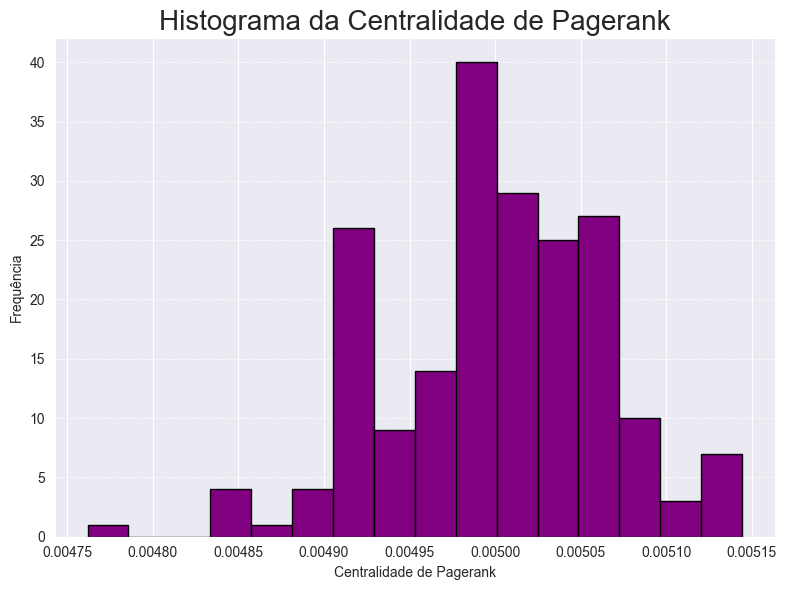

In [21]:
# Extrair os valores da centralidade de autovetor
cpagerank_san200 = list(centralidade_pagerank.values())

# Plotar histograma com intervalos (30 classes)
plt.figure(figsize=(8, 6))
plt.hist(cpagerank_san200, bins='auto', color='purple', edgecolor='black')
plt.xlabel("Centralidade de Pagerank")
plt.ylabel("Frequência")
plt.title("Histograma da Centralidade de Pagerank", fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
try:
    centralidade_katz = nx.katz_centrality(G, alpha=0.08, beta=1, max_iter=1000)
except nx.PowerIterationFailedConvergence:
    print("Erro: Katz centrality não convergiu. Reduza o alpha ou aumente o número de iterações.")
    centralidade_katz = {}

Erro: Katz centrality não convergiu. Reduza o alpha ou aumente o número de iterações.


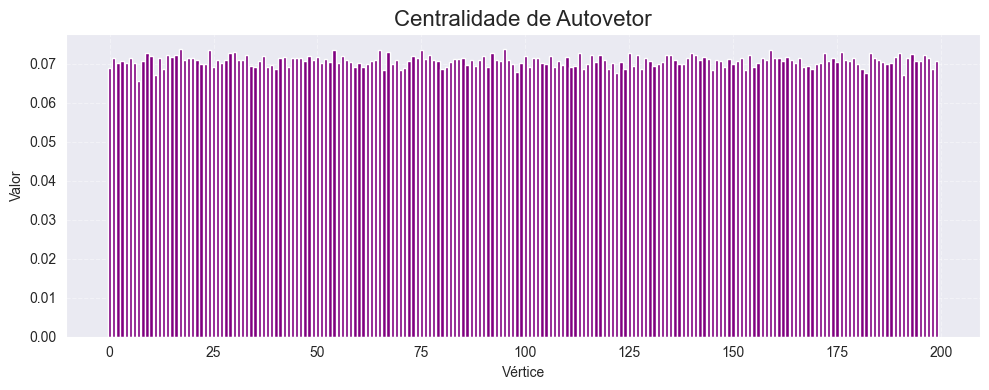

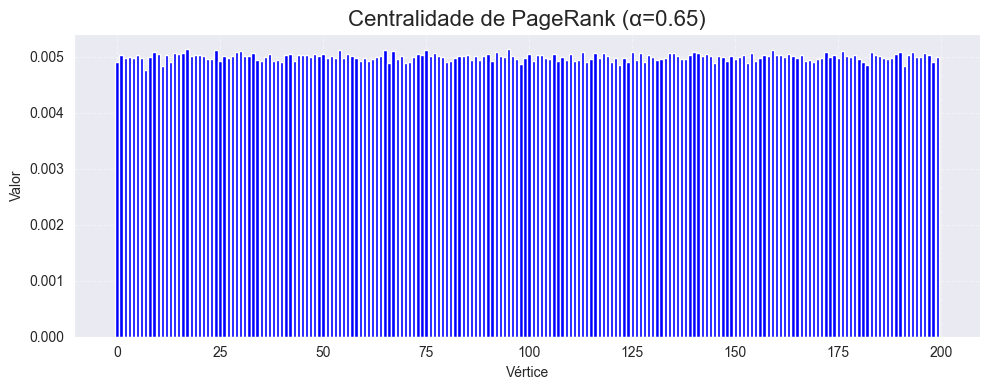

In [23]:
def plot_metric(metric_dict, title, color='dodgerblue'):
    plt.figure(figsize=(10, 4))
    plt.bar(metric_dict.keys(), metric_dict.values(), color=color)
    plt.title(title, fontsize=16)
    plt.xlabel("Vértice")
    plt.ylabel("Valor")
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


plot_metric(centralidade_autovetor, "Centralidade de Autovetor", color='purple')
plot_metric(centralidade_pagerank, "Centralidade de PageRank (α=0.65)", color='blue')
# Só plota se houver resultado válido
if centralidade_katz:
    plot_metric(centralidade_katz, "Centralidade de Katz (α=0.005, β=1)", color='green')

## 4. Análise sobre as Métricas

### 1. Centralidade de Autovetor

A centralidade de autovetor atribui importância a um vértice não apenas com base em seu número de conexões, mas também considerando a influência de seus vizinhos. No grafo analisado, os valores variaram entre **0.0656 e 0.0738**, apresentando distribuição bastante **uniforme**, com destaque leve para vértices como os de índice **17, 24, 54, 65, 75 e 95**.

Essa distribuição é esperada em redes **quase completas**, onde praticamente todos os nós têm graus similares e estão fortemente conectados entre si, o que **reduz a disparidade entre centralidades**.

### 2. Centralidade de PageRank (α = 0.65)

O PageRank adapta a centralidade de autovetor com um fator de amortecimento que favorece estruturas locais. Com α = 0.65, observamos valores entre **0.00476 e 0.00514**, mais uma vez com **variação pequena**.

Os vértices com maior PageRank (como os de índice **17, 24, 54, 65, 75 e 95**) coincidem com os de maior grau, reforçando que **a conectividade local influencia fortemente o valor do PageRank** nesse contexto. A uniformidade novamente confirma o caráter **densamente interligado** do grafo.

### 3. Centralidade de Katz

A tentativa de calcular a centralidade de Katz com **α = 0.08 e β = 1** **não convergiu**, mesmo com o aumento do número de iterações para 50.000. Isso ocorreu provavelmente por conta da **alta densidade da matriz de adjacência**, que faz com que o raio espectral do grafo torne o valor de α inadequado (isto é, maior do que o inverso do maior autovalor do grafo).

Para que a centralidade de Katz funcione corretamente, seria necessário **reduzir α** para garantir convergência, especialmente em grafos densos.

### Conclusão

Tanto a centralidade de autovetor quanto o PageRank indicam que a rede é **altamente homogênea**, com **baixa variação de importância entre os vértices**. Essa homogeneidade decorre do fato de que **praticamente todos os nós têm grau elevado e similar**, e poucos vértices se destacam estruturalmente.

O fracasso da convergência na centralidade de Katz reforça a **complexidade computacional de trabalhar com redes densas**, exigindo ajustes finos nos parâmetros para alcançar estabilidade numérica. Mais uma vez, a análise confirma que o grafo possui uma **estrutura fortemente conectada e distribuída de forma equilibrada entre os nós**, sem hubs dominantes.

---

# 5 - Considere o arquivo **ia-infect-dublin.mtx**

1. Gere o grafo(rede) associado ao arquivo
2. Gere um conjunto com os **core number** do grafo.
3. Para cada **core number** gere uma lista com seus respectivos vértices.
4. Selecione um $k$ do conjunto gerado no item 1. Encontre os vértices pertecentes ao $k$-core e gere o subgrafo associado a esse $k$-core.
5. Selecione um $k$ do conjunto gerado no item 1. Encontre os vértices pertecentes ao $k$-shell e gere o subgrafo associado a esse $k$-shell.

In [24]:
# 1. Geração do grafo

mtx_path = "data/ia-infect-dublin.mtx"

# Criar grafo vazio
G_dublin = nx.Graph()

# Leitura manual ignorando cabeçalho
with open(mtx_path, 'r') as f:
    lines = f.readlines()

# Ignorar as linhas de cabeçalho
edges = [
    tuple(map(int, line.strip().split()))
    for line in lines
    if not line.startswith('%') and len(line.strip().split()) == 2
]

# Adicionar arestas ao grafo
G_dublin.add_edges_from(edges)

print(f"Grafo carregado com {G_dublin.number_of_nodes()} vértices e {G_dublin.number_of_edges()} arestas.")

Grafo carregado com 410 vértices e 2765 arestas.


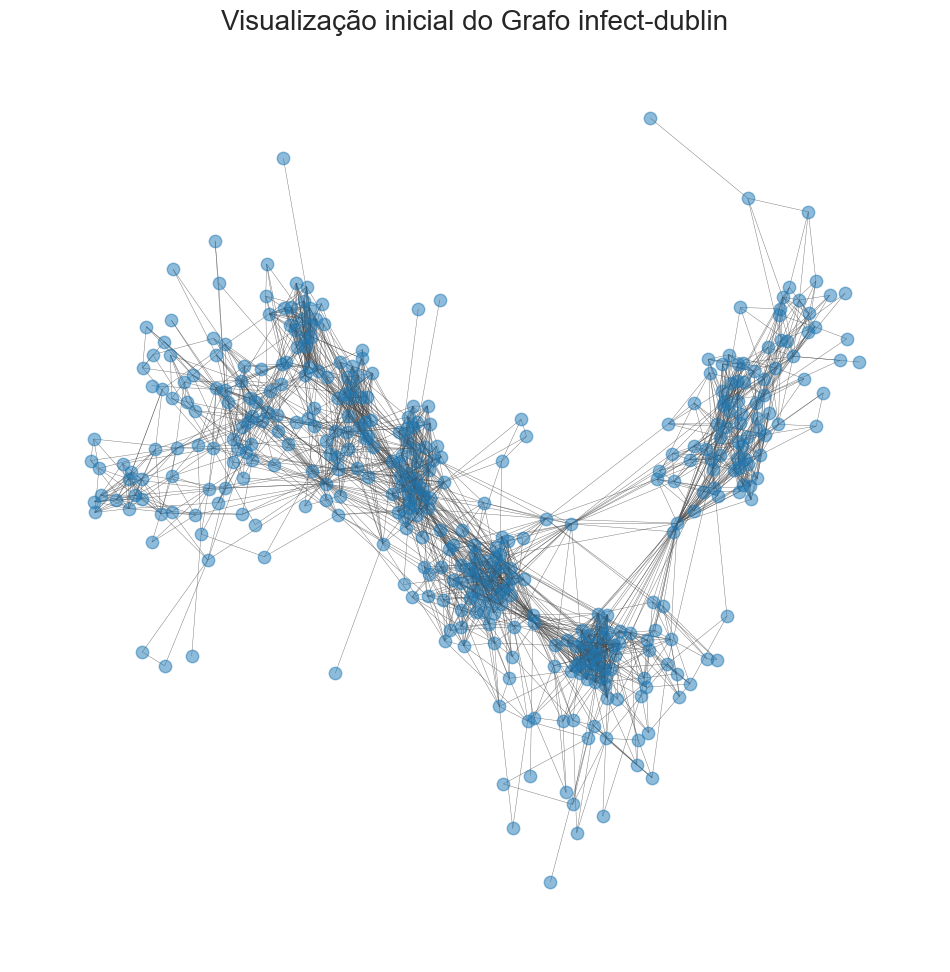

In [25]:
# Layout mais apropriado para densidade visual
pos = nx.spring_layout(G_dublin, seed=568381, k=0.2, iterations=100)

# Ajustar tamanho da aresta com base em algum critério (aqui: constante)
edge_width = 0.3

plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(
    G_dublin,
    pos,
    node_size=80,
    node_color="#1f78b4",
    alpha=0.5,
)
nx.draw_networkx_edges(
    G_dublin,
    pos,
    node_size=500,
    width=edge_width,  # controle de espessura das arestas
    edge_color="#444444",
    alpha=0.8,

)

plt.title("Visualização inicial do Grafo infect-dublin", fontsize=20)
plt.axis('off')
plt.show()

In [26]:
# 2. Cálculo dos core numbers
core_numbers = nx.core_number(G_dublin)

# Conjunto de valores únicos de core
k_cores = sorted(set(core_numbers.values()))
print("Valores únicos de k-core encontrados:", k_cores)

Valores únicos de k-core encontrados: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 17]


In [27]:
# 3. Agrupar vértices por core number
vertices_por_core = defaultdict(list)
for node, core in core_numbers.items():
    vertices_por_core[core].append(node)

# Mostrar agrupamento
for k in k_cores:
    print(f"k = {k}: {len(vertices_por_core[k])} vértices")

k = 1: 10 vértices
k = 2: 17 vértices
k = 3: 22 vértices
k = 4: 18 vértices
k = 5: 33 vértices
k = 6: 34 vértices
k = 7: 32 vértices
k = 8: 61 vértices
k = 9: 21 vértices
k = 10: 33 vértices
k = 11: 3 vértices
k = 12: 72 vértices
k = 13: 22 vértices
k = 17: 32 vértices


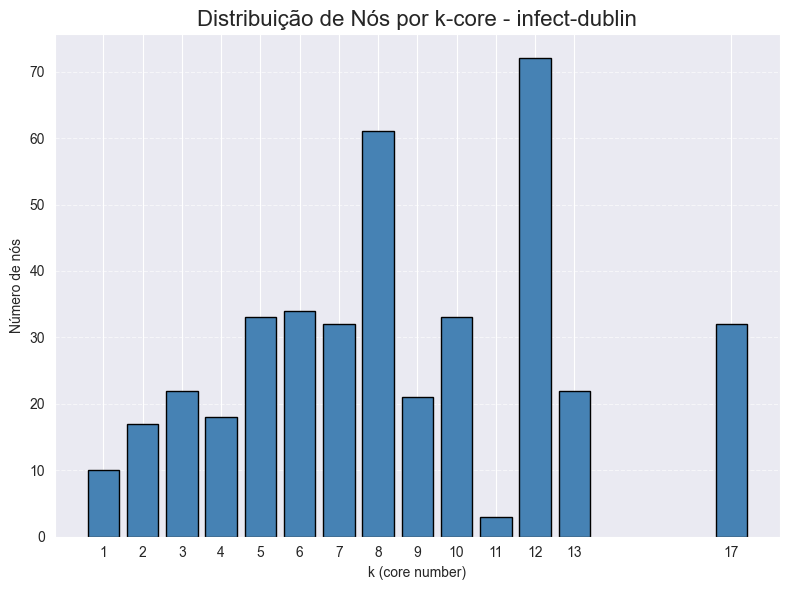

In [28]:
# Contar quantos nós estão em cada k-core
contagem_cores = Counter(core_numbers.values())

# Ordenar por k
ks = sorted(contagem_cores.keys())
frequencias = [contagem_cores[k] for k in ks]

# Plotar gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(ks, frequencias, color='steelblue', edgecolor='black')
plt.xlabel("k (core number)")
plt.ylabel("Número de nós")
plt.title("Distribuição de Nós por k-core - infect-dublin", fontsize=16)
plt.xticks(ks)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- k-core para k = 12
- Número de nós: 126
- Número de arestas: 1182
- Vértices no k-core: [1, 2, 5, 7, 8, 9, 11, 12, 13, 21, 29, 30, 37, 39, 43, 47, 49, 51, 54, 58, 60, 61, 63, 64, 67, 74, 75, 78, 85, 90, 91, 94, 97, 104, 105, 111, 114, 116, 120, 121, 125, 126, 130, 140, 144, 147, 148, 149, 150, 154, 155, 157, 162, 163, 168, 173, 177, 178, 180, 182, 183, 184, 185, 189, 192, 193, 200, 201, 205, 208, 210, 213, 216, 217, 222, 223, 225, 226, 228, 231, 233, 235, 237, 239, 255, 261, 266, 270, 271, 273, 274, 277, 278, 282, 283, 286, 288, 291, 293, 300, 305, 314, 318, 320, 323, 328, 333, 335, 337, 342, 343, 348, 349, 357, 362, 364, 366, 370, 372, 377, 380, 392, 397, 402, 408, 410]


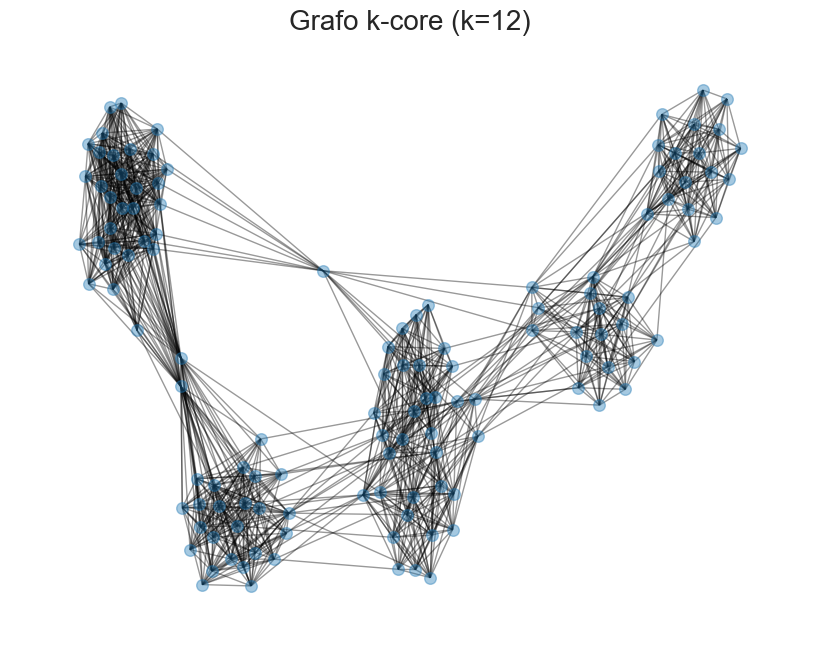

In [41]:
# 4. Seleção de um valor k para gerar o subgrafo do k-core
kc_exemplo = 12

# Obter o subgrafo correspondente ao k-core
k_core_subgrafo = nx.k_core(G_dublin, k=kc_exemplo)

# Obter lista de vértices do k-core
vertices_k_core = list(k_core_subgrafo.nodes)

# Exibir estatísticas e vértices
print(f"- k-core para k = {kc_exemplo}")
print(f"- Número de nós: {len(vertices_k_core)}")
print(f"- Número de arestas: {k_core_subgrafo.number_of_edges()}")
print(f"- Vértices no k-core: {sorted(vertices_k_core)}")

# Visualização do subgrafo k-core
plt.figure(figsize=(8, 6))
nx.draw(k_core_subgrafo, node_size=70, alpha=0.4, with_labels=False)
plt.title(f"Grafo k-core (k={kc_exemplo})", fontsize=20)
plt.show()

- k-shell para k = 12
- Número de nós: 72
- Número de arestas: 564
- Vértices no k-shell: [1, 5, 9, 11, 13, 21, 29, 30, 37, 47, 49, 54, 58, 60, 61, 64, 78, 85, 90, 91, 97, 105, 111, 114, 120, 125, 126, 130, 140, 144, 147, 150, 155, 157, 163, 168, 173, 177, 180, 185, 189, 205, 210, 213, 225, 231, 233, 237, 261, 266, 273, 274, 277, 288, 293, 300, 305, 314, 318, 323, 328, 333, 335, 337, 342, 348, 349, 364, 377, 392, 402, 408]


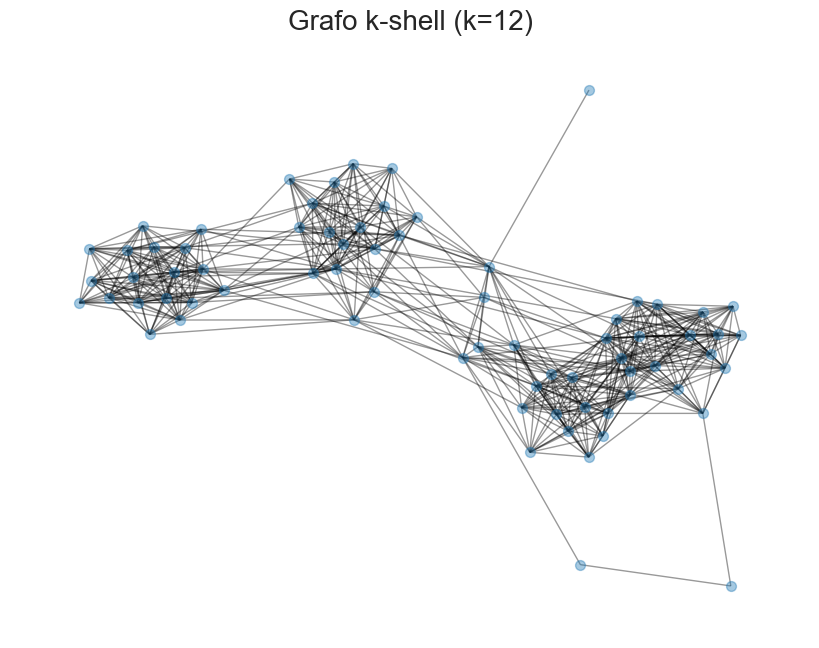

In [42]:
# 5. k-shell = nós com core number exatamente igual a k
ks_exemplo = 12

# Identificar os vértices no k-shell
k_shell_nodes = [node for node, core in core_numbers.items() if core == ks_exemplo]

# Criar subgrafo do k-shell
k_shell_subgrafo = G_dublin.subgraph(k_shell_nodes)

# Estatísticas
print(f"- k-shell para k = {ks_exemplo}")
print(f"- Número de nós: {len(k_shell_nodes)}")
print(f"- Número de arestas: {k_shell_subgrafo.number_of_edges()}")
print(f"- Vértices no k-shell: {sorted(k_shell_nodes)}")

# Visualização
plt.figure(figsize=(8, 6))
nx.draw(k_shell_subgrafo, node_size=50, with_labels=False, alpha=0.4)
plt.title(f"Grafo k-shell (k={ks_exemplo})", fontsize=20)
plt.show()

---

# 6- Dado o arquivo **ia-hospital-ward-proximity-attr.csv**, faça o que se pede:
1. Crie o grafo(rede) associado ao dataset.
2. Gere um gráfico para mostrar o grafo criado.
3. Calcule a assortatividade dos atributos categóricos em relação aos status(NUR=paramedical staff; PAT=Patient; MED=Medical doctor; ADM=administrative staff) dos vértices do grafo.
4. Gere um gráfico que mostre os resultados obtidos no item 3.

In [31]:
# 1. Caminho para o dataset
csv_path = "data/ia-hospital-ward-proximity-attr.csv"

# Leitura dos dados
df = pd.read_csv(csv_path).copy()

# Filtrar apenas colunas relevantes
df = df[['i', 'j', 'Si', 'Sj']]

# Eliminar duplicatas de contatos entre pares (considerando contato não direcionado)
df_unique = df.drop_duplicates(subset=['i', 'j'])

# Criar grafo não direcionado
G_hospital = nx.Graph()

# Adicionar arestas com atributos de status
for _, row in df_unique.iterrows():
    i, j, Si, Sj = row
    G_hospital.add_node(i, status=Si)
    G_hospital.add_node(j, status=Sj)
    G_hospital.add_edge(i, j)

print(f" Grafo criado com {G_hospital.number_of_nodes()} nós e {G_hospital.number_of_edges()} arestas.")

 Grafo criado com 75 nós e 1139 arestas.


In [32]:
display(df_unique.reset_index(drop=True))

,i,j,Si,Sj
0,1157,1232,3,4
1,1157,1191,3,3
2,1157,1159,3,3
3,1159,1191,3,3
4,1144,1159,3,3
...,...,...,...,...
1134,1535,1629,4,1
1135,1115,1142,1,1
1136,1232,1401,4,2
1137,1232,1769,4,2


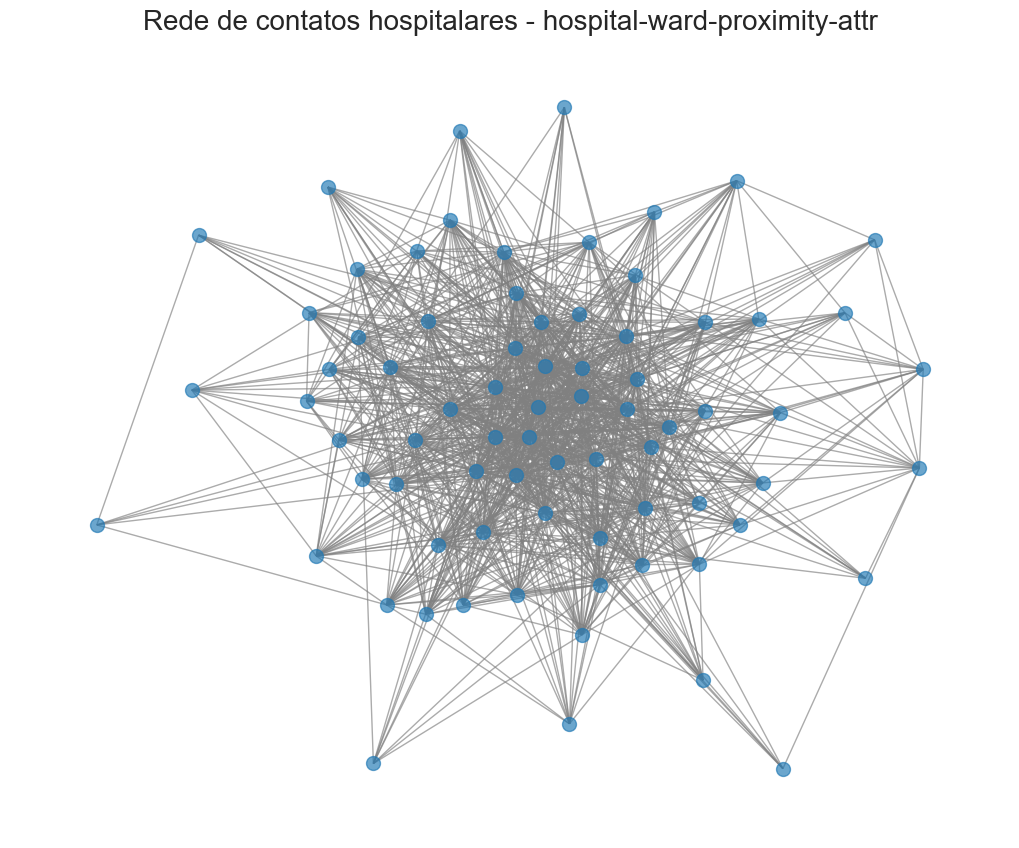

In [33]:
# 2. Visualização simples do grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(
    G_hospital,
    seed=568381)
nx.draw(
    G_hospital,
    pos,
    node_size=100,
    alpha=0.66,
    edge_color='gray',
    with_labels=False)
plt.title("Rede de contatos hospitalares - hospital-ward-proximity-attr", fontsize=20)
plt.show()

In [34]:
# 3. Converter os valores de status para string legível
status_map = {
    1: "NUR",  # paramedical staff
    2: "PAT",  # patient
    3: "MED",  # medical doctor
    4: "ADM",  # administrative staff
}
nx.set_node_attributes(G_hospital, {
    n: status_map.get(d['status'], 'UNK') for n, d in G_hospital.nodes(data=True)
}, "role")

# Calcular assortatividade por atributo categórico (status)
assortatividade_status = nx.attribute_assortativity_coefficient(G_hospital, "role")
print(f"Assortatividade por status: {assortatividade_status:.4f}")

Assortatividade por status: -0.1214


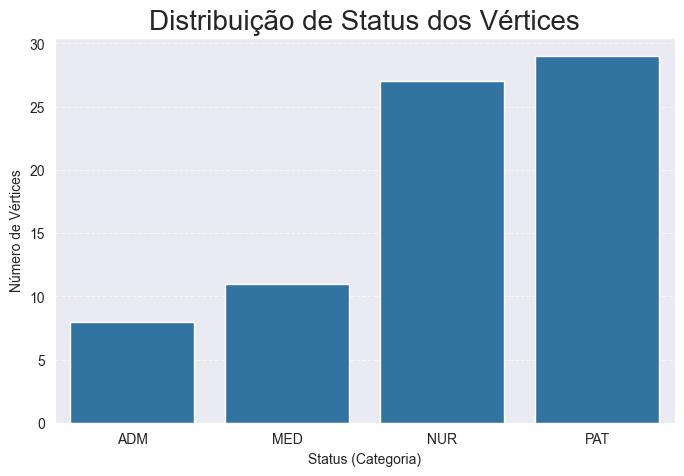

In [35]:
# 4. Contar frequência de cada status
df_status = pd.DataFrame.from_dict(dict(G_hospital.nodes(data="role")), orient='index', columns=["status"])
frequencia_status = df_status["status"].value_counts().sort_index()

# Plotar gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=frequencia_status.index, y=frequencia_status.values)
plt.title("Distribuição de Status dos Vértices", fontsize=20)
plt.xlabel("Status (Categoria)")
plt.ylabel("Número de Vértices")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [38]:
# Mapear cada papel para nome
status_map = {
    1: "NUR",  # paramedical staff
    2: "PAT",  # patient
    3: "MED",  # medical doctor
    4: "ADM",  # administrative staff
}

# Criar lista de arestas categóricas (role-source, role-target)
categorical_edges = []
for u, v in G_hospital.edges():
    role_u = status_map.get(G_hospital.nodes[u]['status'], 'UNK')
    role_v = status_map.get(G_hospital.nodes[v]['status'], 'UNK')
    # Ordenar papéis para evitar duplicatas invertidas (ex: MED→PAT e PAT→MED)
    pair = tuple(sorted((role_u, role_v)))
    categorical_edges.append(pair)

# Contar conexões entre categorias
edge_counts = Counter(categorical_edges)

# Preparar dados para Sankey
roles = ["NUR", "PAT", "MED", "ADM"]
role_idx = {role: i for i, role in enumerate(roles)}

sources, targets, values = [], [], []

for (r1, r2), count in edge_counts.items():
    sources.append(role_idx[r1])
    targets.append(role_idx[r2])
    values.append(count)

# Criar Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=roles,
        color="blue"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    ))])

fig.update_layout(title_text="Chord Diagram (Sankey) - Assortatividade por Status", font_size=12)
fig.show()

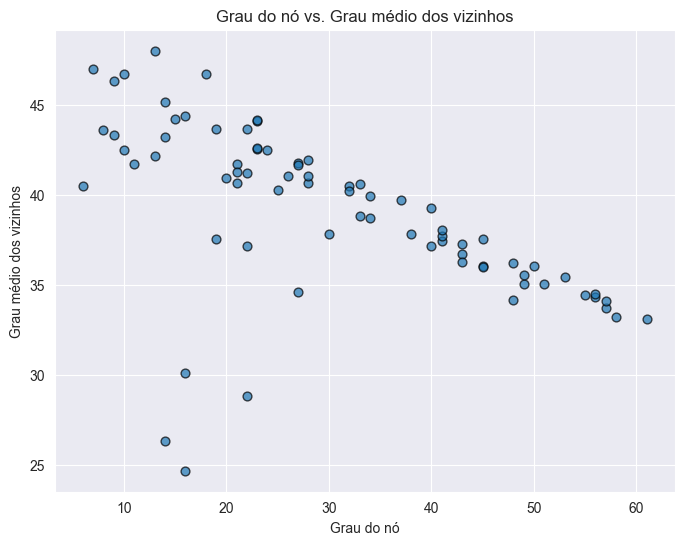

In [39]:
# Para cada nó, obter seu grau e o grau médio de seus vizinhos
graus = []
graus_vizinhos = []

for node in G_hospital.nodes():
    k = G_hospital.degree(node)
    vizinhos = list(G_hospital.neighbors(node))
    if len(vizinhos) > 0:
        k_vizinhos = np.mean([G_hospital.degree(v) for v in vizinhos])
        graus.append(k)
        graus_vizinhos.append(k_vizinhos)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(graus, graus_vizinhos, alpha=0.7, s=40, edgecolors='k')
plt.xlabel("Grau do nó")
plt.ylabel("Grau médio dos vizinhos")
plt.title("Grau do nó vs. Grau médio dos vizinhos")
plt.grid(True)
plt.show()